Predicting life expectancy for different countries with the GapMinder dataset using Lasso Regression Classifier using  Python Scikit Learn and Pandas
-------------------------------------------------------------------------------------------------------------------------------------

A **lasso regression analysis** was conducted to identify a subset of variables from a pool of 14 quantitative predictor variables that best predicted a quantitative response variable measuring the *life expectancy* in different countries. Quantitative predictor variables include income per person, alcohol consumption, armed forces rate, breast cancer per 100th, co2 emissions, female employment rate, hiv rate, internet use rate, oil per person, polity score, relectric per person, suicide per 100th, employment rate, urbanization rate. All predictor variables were standardized (*z-score normalized*) to have a mean of zero and a standard deviation of one.

After removal of the NA values in the life expectancy variable, the predictor variables in the original dataset were imputed, the missing values in the numeric columns were replaced with median values. Then the data were randomly split into a training set that included 70% of the observations (N=133) and a test set that included 30% of the observations (N=58). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

Of the 14 predictor variables, 9 were retained in the selected model. During the estimation process, *internetuserate*
 and *hivrate* were most strongly associated with *life expectancy*, followed by *polityscore* and *employrate*. The variables *hivrate* and *employrate* were negatively associated with *life expectancy* and *polityscore* and *internetuserate* were positively associated with *life expectancy*. Other predictors associated with *life expectancy* included alcconsumption, incomeperperson, suicideper100th, urbanrate and armedforcesrate. These 9 variables accounted for 74.12% of the variance in the *life expectancy* response variable.

The model learnt from the training dataset was used to predict the *life expectancy* for the countries in the test dataset. The *mean square error* on the train and test dataset are shown below, the model could explain ~66.12% variance on the held-out unseen dataset. The figures below show the results (the coefficients, the Change in the validation mean square error at each step, how the alpha is chosen with cross validation etc.) with Lasso Regression.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

In [2]:
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
%matplotlib inline

#Load the dataset
GM_data = pd.read_csv("C:\\courses\\Coursera\\Current\\ML for Data Analysis\\Week3\\gapminder.csv")
data_clean = GM_data.dropna()

data_clean.dtypes
data_clean.describe()

data_clean = data_clean.drop('country', 1)
data_clean = data_clean.convert_objects(convert_numeric=True) #.dtypes
#data_clean = data_clean.dropna()
data_clean = data_clean.dropna(subset = ['lifeexpectancy'])
data_clean.head()

#upper-case all DataFrame column names
#data_clean.columns = map(str.upper, data_clean.columns)

#select predictor variables and target variable as separate data sets  
predvar= data_clean[['incomeperperson','alcconsumption','armedforcesrate',
                     'breastcancerper100th','co2emissions','femaleemployrate','hivrate', 
                     'internetuserate','oilperperson','polityscore','relectricperperson',
                     'suicideper100th','employrate','urbanrate']]

#data_clean['lifeexpectancy'] = pd.cut(data_clean.lifeexpectancy, bins=[0,70,100])
#data_clean = data_clean.dropna(subset = ['lifeexpectancy'])

target = data_clean.lifeexpectancy
 
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
predictors = predictors.fillna(predictors.median())
from sklearn import preprocessing
predictors['incomeperperson']=preprocessing.scale(predictors['incomeperperson'].astype('float64'))
predictors['alcconsumption']=preprocessing.scale(predictors['alcconsumption'].astype('float64'))
predictors['armedforcesrate']=preprocessing.scale(predictors['armedforcesrate'].astype('float64'))
predictors['breastcancerper100th']=preprocessing.scale(predictors['breastcancerper100th'].astype('float64'))
predictors['co2emissions']=preprocessing.scale(predictors['co2emissions'].astype('float64'))
predictors['femaleemployrate']=preprocessing.scale(predictors['femaleemployrate'].astype('float64'))
predictors['hivrate']=preprocessing.scale(predictors['hivrate'].astype('float64'))
predictors['internetuserate']=preprocessing.scale(predictors['internetuserate'].astype('float64'))
predictors['oilperperson']=preprocessing.scale(predictors['oilperperson'].astype('float64'))
predictors['polityscore']=preprocessing.scale(predictors['polityscore'].astype('float64'))
predictors['relectricperperson']=preprocessing.scale(predictors['relectricperperson'].astype('float64'))
predictors['suicideper100th']=preprocessing.scale(predictors['suicideper100th'].astype('float64'))
predictors['employrate']=preprocessing.scale(predictors['employrate'].astype('float64'))
predictors['urbanrate']=preprocessing.scale(predictors['urbanrate'].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'alcconsumption': -0.14130650117737339,
 'armedforcesrate': 0.35471292244623698,
 'breastcancerper100th': 0.0,
 'co2emissions': 0.0,
 'employrate': -1.2972472147653322,
 'femaleemployrate': 0.0,
 'hivrate': -3.4897386781551316,
 'incomeperperson': 0.077045133952796996,
 'internetuserate': 4.4754404806196222,
 'oilperperson': 0.0,
 'polityscore': 1.3628309963989624,
 'relectricperperson': 0.0,
 'suicideper100th': -0.49459920657916617,
 'urbanrate': 0.83363420775836605}

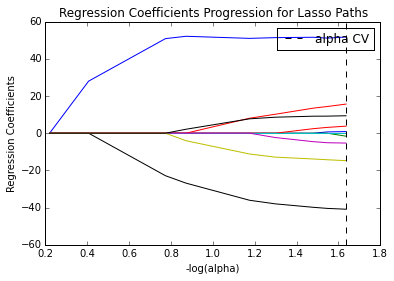

In [3]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.legend()
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

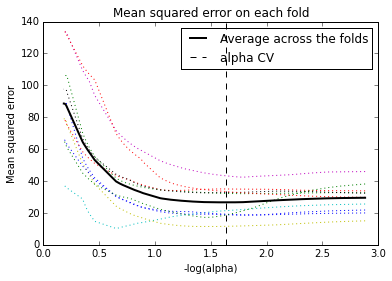

In [4]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

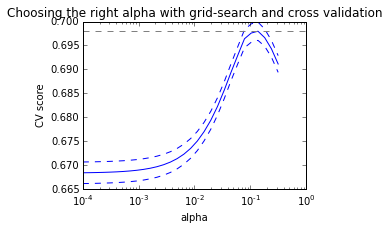

In [5]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso

lasso = Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, pred_train, tar_train, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(pred_train)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(pred_train)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.title('Choosing the right alpha with grid-search and cross validation')
plt.show()

In [6]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
22.8123709324
test data MSE
35.8843281685


In [7]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.741196286274
test data R-square
0.662066604108


Comparing Lasso with Linear Regression
----------------------------------------
As can be seen from the results below, is performing better on the held-out dataset, the model is more generalizable. 

In [8]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(pred_train, tar_train)
# The coefficients
#print('Coefficients: \n', regr.coef_)
print(dict(zip(predictors.columns, regr.coef_)))

{'hivrate': -3.8344571892352559, 'co2emissions': 0.096787114611344177, 'oilperperson': 0.0351065245841512, 'urbanrate': 0.86155708172804912, 'internetuserate': 5.0152935091191999, 'armedforcesrate': 0.61262610352232227, 'incomeperperson': 0.46216405180319331, 'polityscore': 2.0123854459607182, 'femaleemployrate': 1.1202101789322698, 'suicideper100th': -0.68776256824454296, 'breastcancerper100th': -1.0993691668696588, 'alcconsumption': -0.83113290898076442, 'employrate': -2.6051934133371022, 'relectricperperson': 0.15236659683560672}


In [9]:
# The mean square error
train_error = mean_squared_error(tar_train, regr.predict(pred_train))
test_error = mean_squared_error(tar_test, regr.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
21.7615307335
test data MSE
38.2548762373


In [10]:
# R-square from training and test data
rsquared_train=regr.score(pred_train,tar_train)
rsquared_test=regr.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.753117946973
test data R-square
0.639742447577


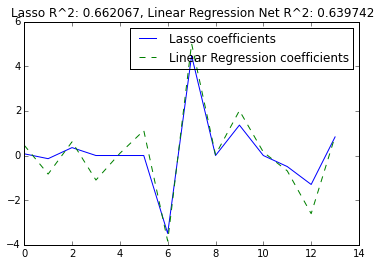

In [11]:
plt.plot(model.coef_, label='Lasso coefficients')
plt.plot(regr.coef_, '--', label='Linear Regression coefficients')
plt.legend()#loc='best')
plt.title("Lasso R^2: %f, Linear Regression Net R^2: %f"
          % (model.score(pred_test,tar_test), regr.score(pred_test,tar_test)))
plt.show()